<a href="https://colab.research.google.com/github/nasernayem/Finential_Data_Analysis/blob/main/Finential_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Dataset/credit_risk_dataset.csv")

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [9]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_amnt                   28638 non-null  int64  
 6   loan_int_rate               28638 non-null  float64
 7   loan_status                 28638 non-null  int64  
 8   loan_percent_income         28638 non-null  float64
 9   cb_person_default_on_file   28638 non-null  object 
 10  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.6+ MB


In [13]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [14]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

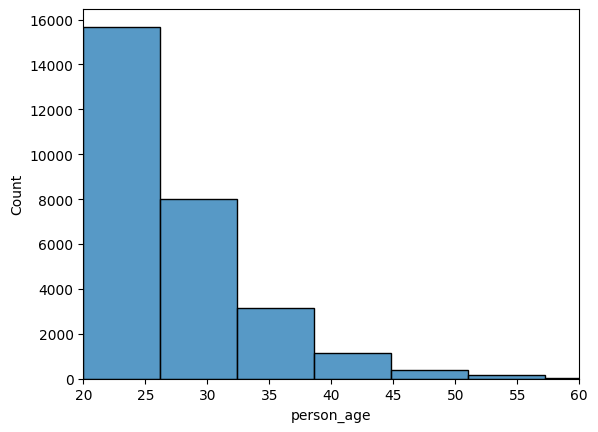

In [15]:
sns.histplot(data=df, x='person_age',bins=20)
plt.xlim(20,60);

<Axes: xlabel='person_age', ylabel='person_income'>

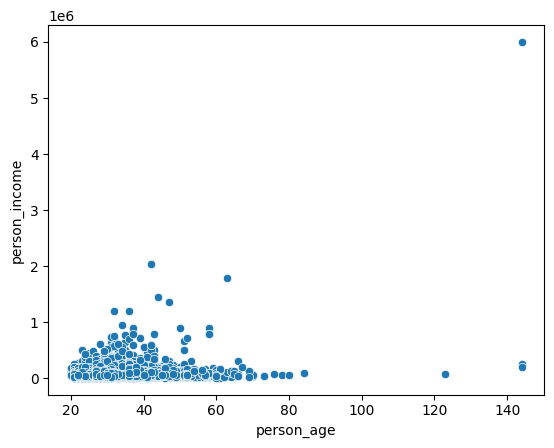

In [16]:
sns.scatterplot(data=df,x='person_age',y='person_income')

<Axes: xlabel='person_age', ylabel='person_emp_length'>

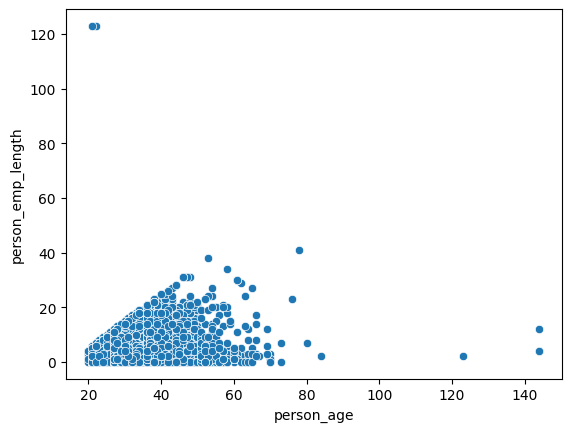

In [17]:
sns.scatterplot(data=df,x='person_age',y='person_emp_length')

In [18]:
inconsistant = df[(df['person_age'] > 75) | (df['person_emp_length']>50)].index

In [19]:
inconsistant

Index([0, 81, 183, 210, 575, 32297, 32355, 32422, 32506, 32534], dtype='int64')

In [20]:
df = df.drop(inconsistant, axis=0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28628 entries, 1 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28628 non-null  int64  
 1   person_income               28628 non-null  int64  
 2   person_home_ownership       28628 non-null  object 
 3   person_emp_length           28628 non-null  float64
 4   loan_intent                 28628 non-null  object 
 5   loan_amnt                   28628 non-null  int64  
 6   loan_int_rate               28628 non-null  float64
 7   loan_status                 28628 non-null  int64  
 8   loan_percent_income         28628 non-null  float64
 9   cb_person_default_on_file   28628 non-null  object 
 10  cb_person_cred_hist_length  28628 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.6+ MB


<Axes: xlabel='person_age', ylabel='person_income'>

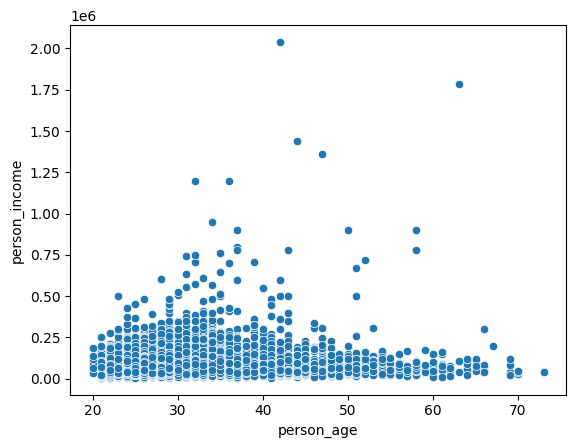

In [22]:
sns.scatterplot(data=df,x='person_age',y='person_income')

<Axes: xlabel='person_age', ylabel='person_emp_length'>

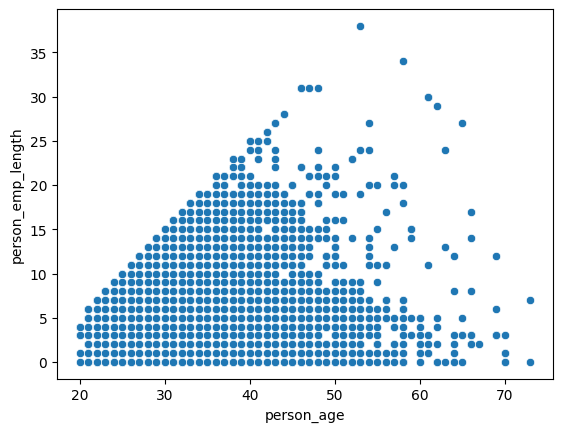

In [23]:
sns.scatterplot(data=df,x='person_age',y='person_emp_length')

Age Analysis
- Young = 18 - 29 years
- Young Adults = 30 - 40 years
- Senior = 41 - 55 years
- Elder = >55 years

In [25]:
df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['person_age'] > 18) & (col['person_age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['person_age'] > 29) & (col['person_age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['person_age'] > 40) & (col['person_age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['person_age'] > 55, 'Age_Group'] = 'Elder'

In [26]:
df['Age_Group']

1         Young
2         Young
3         Young
4         Young
5         Young
          ...  
32576     Elder
32577    Senior
32578     Elder
32579     Elder
32580     Elder
Name: Age_Group, Length: 28628, dtype: object

<Axes: xlabel='Age_Group', ylabel='Count'>

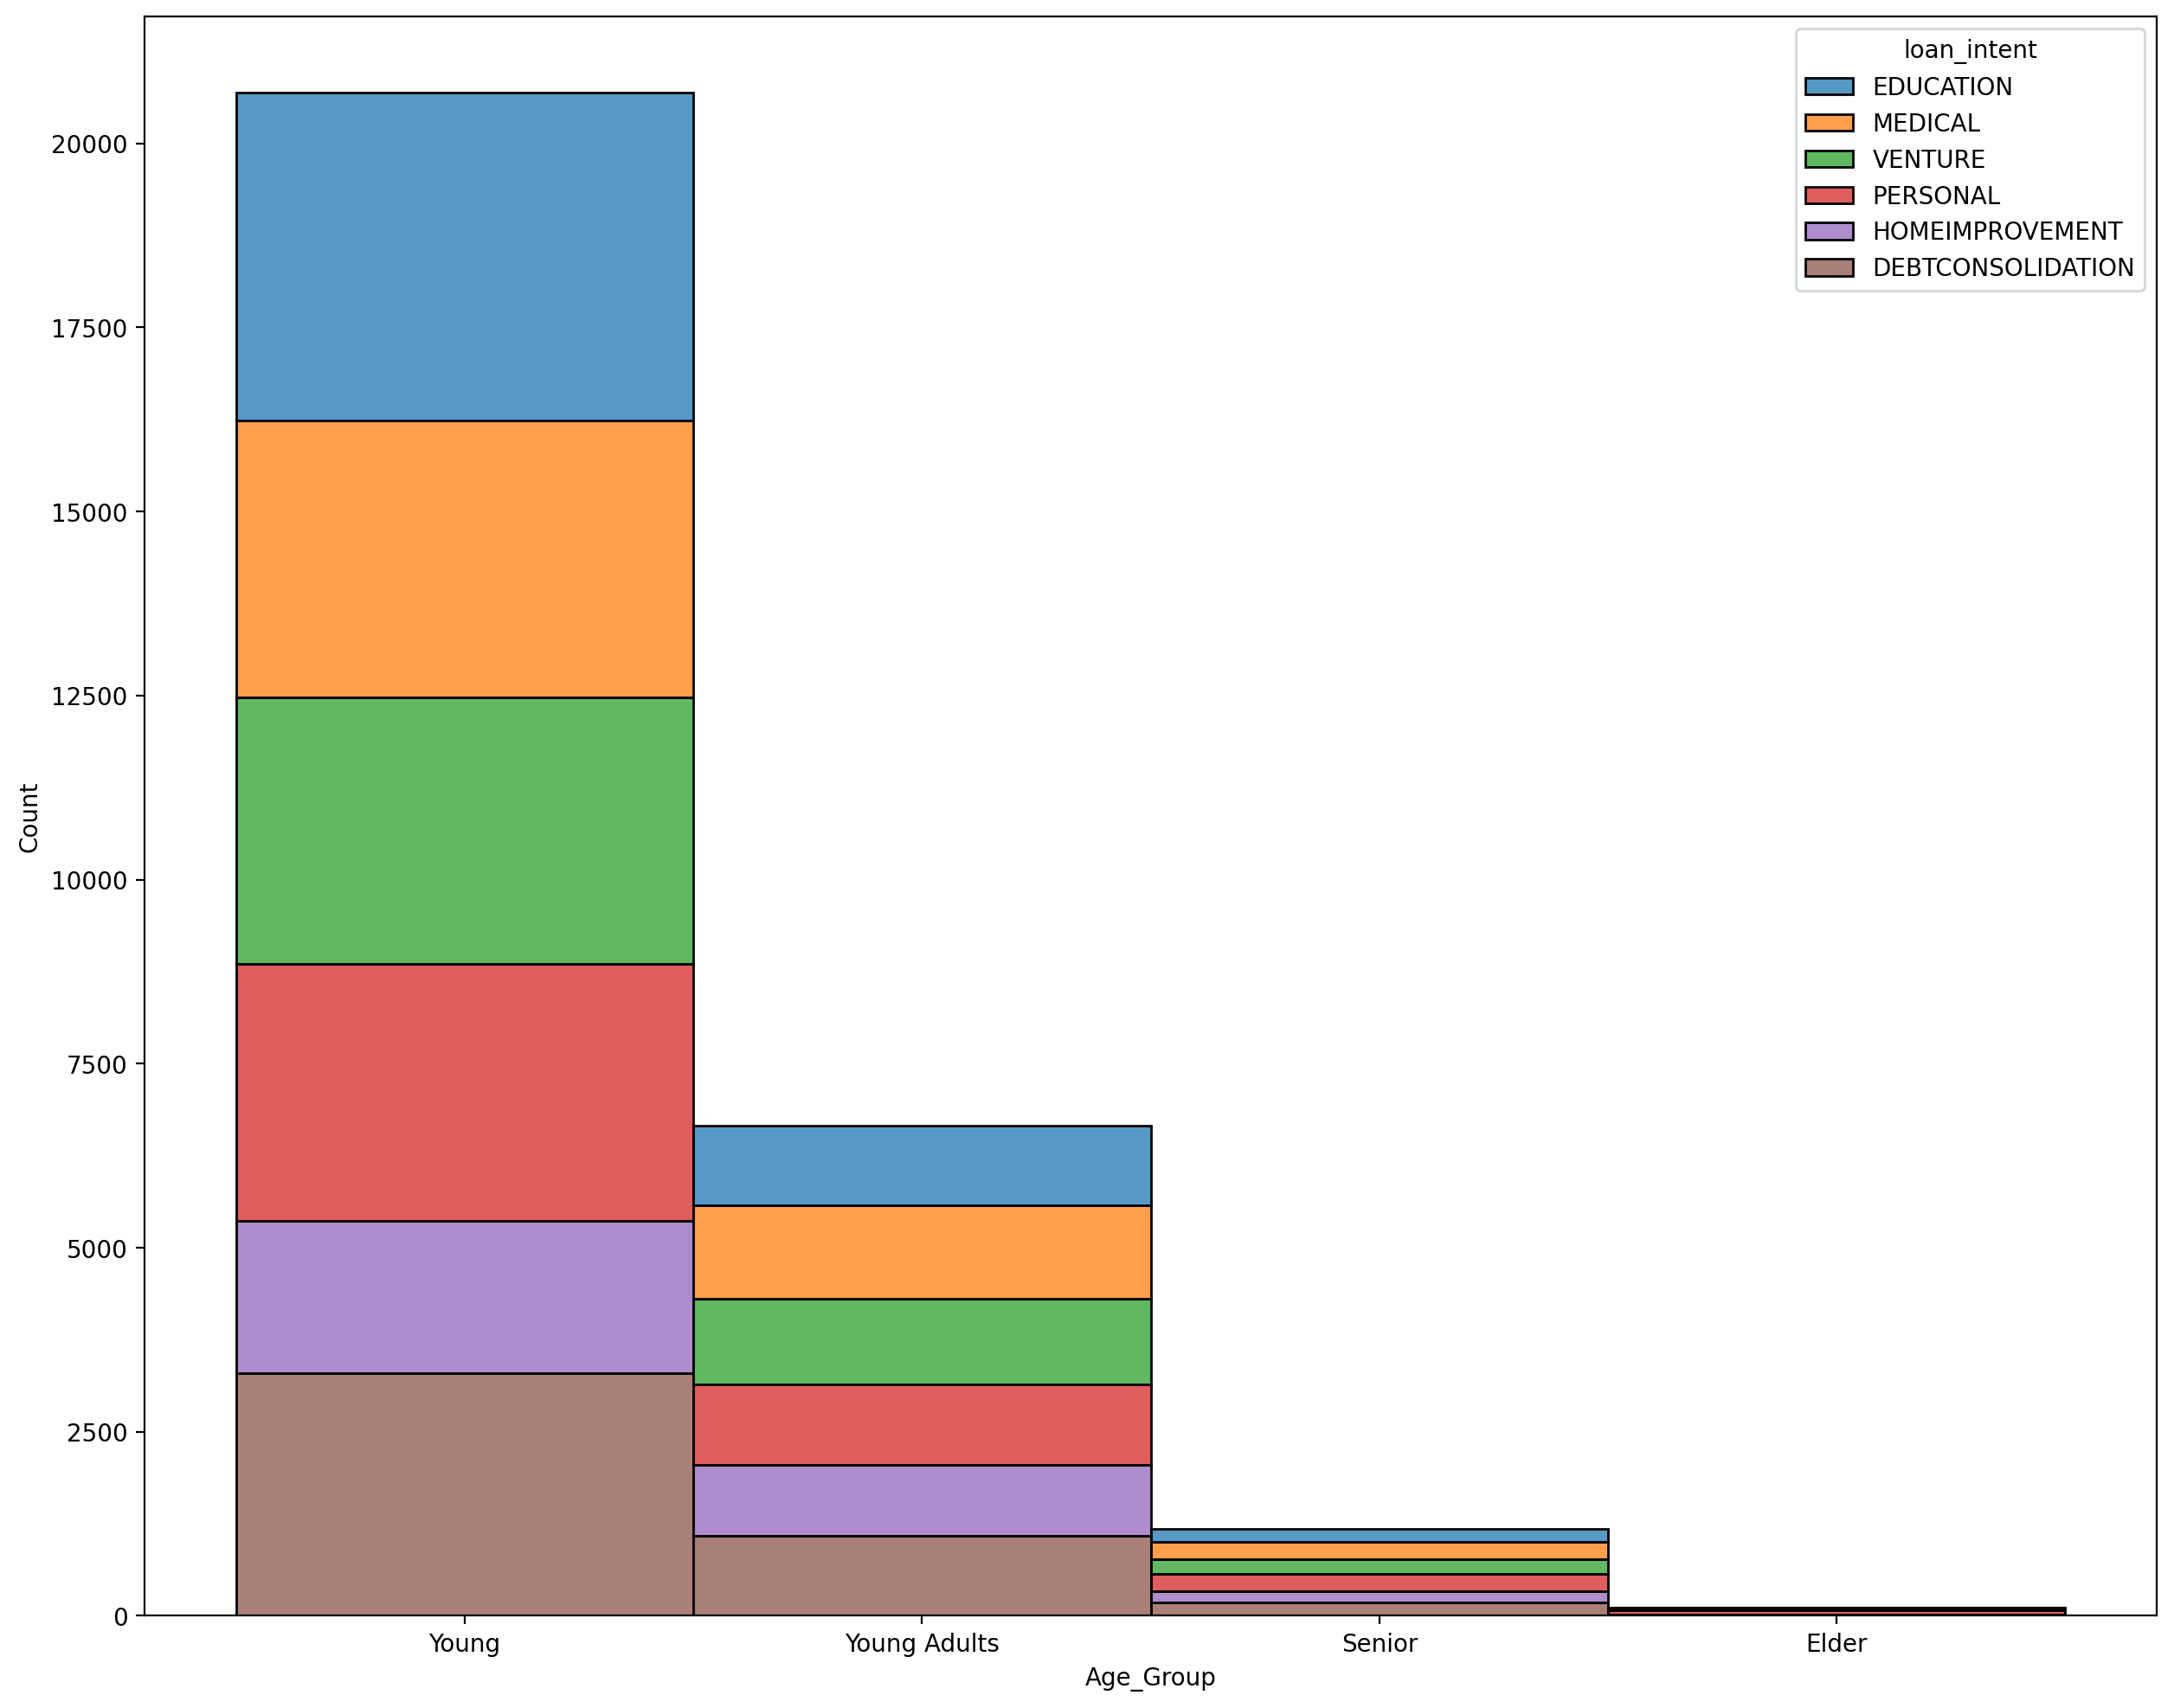

In [27]:
plt.figure(figsize=(15,12),dpi=200)
sns.histplot(data=df, x='Age_Group',hue='loan_intent',multiple='stack')

In [28]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'Age_Group'],
      dtype='object')

In [29]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Age_Group
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,Young
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,Young
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,Young
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,Young
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,Young
6,26,77100,RENT,8.0,EDUCATION,35000,12.42,1,0.45,N,3,Young
7,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4,Young
8,24,83000,RENT,8.0,PERSONAL,35000,8.90,1,0.42,N,2,Young
9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3,Young
10,22,85000,RENT,6.0,VENTURE,35000,10.37,1,0.41,N,4,Young


<Axes: xlabel='person_age', ylabel='loan_status'>

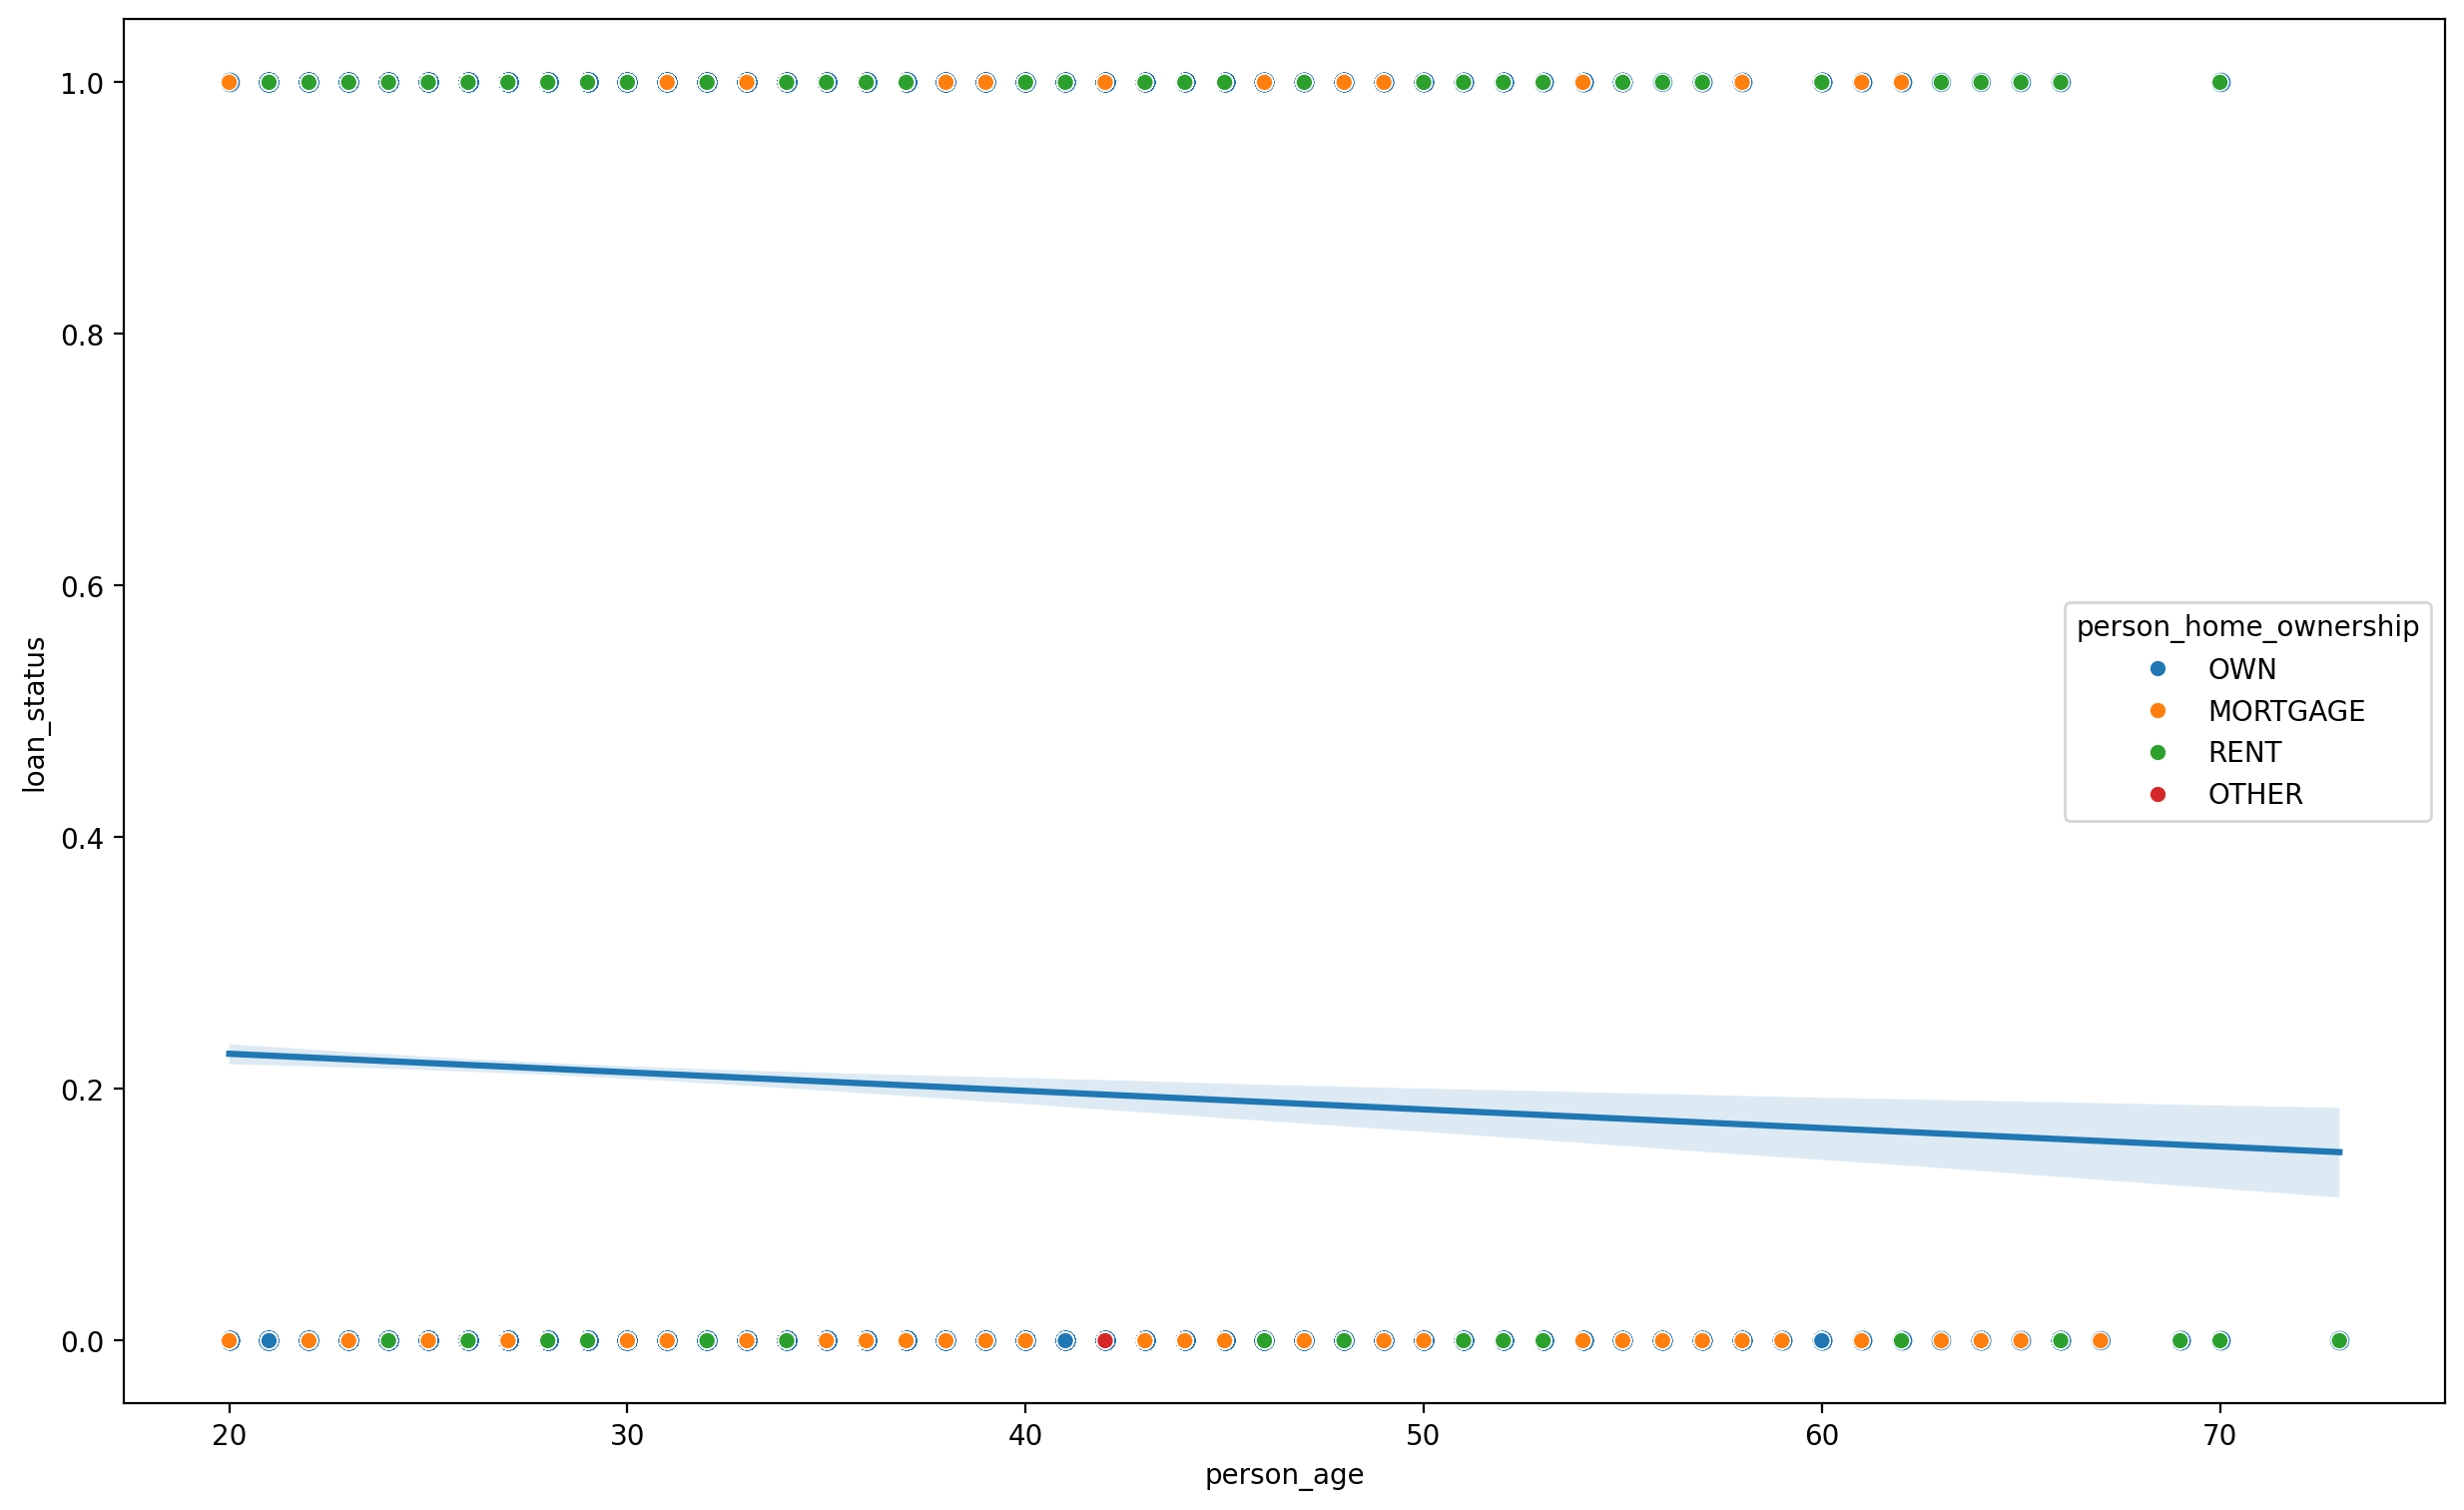

In [30]:
plt.figure(figsize=(15,9),dpi=200)
sns.scatterplot(data=df, x='person_age', y='loan_status')
sns.regplot(data=df, x='person_age', y='loan_status')
sns.scatterplot(data=df, x='person_age', y='loan_status', hue='person_home_ownership')

In [31]:
df['Age_Group'].value_counts()

Age_Group
Young           20684
Young Adults     6654
Senior           1176
Elder             114
Name: count, dtype: int64

<Axes: xlabel='Age_Group', ylabel='count'>

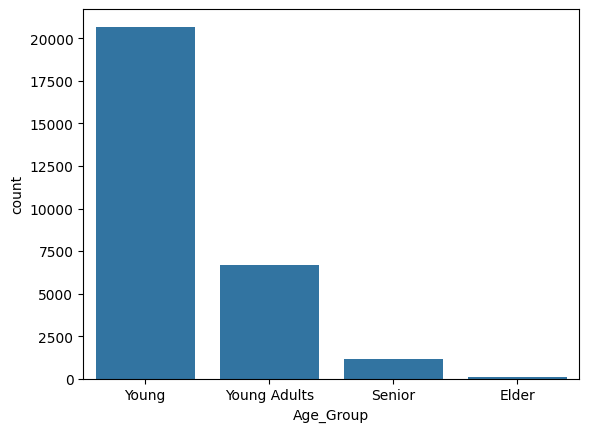

In [32]:
sns.countplot(data=df, x='Age_Group')

In [33]:
credit_bad = df[df['loan_status']==1]
credit_good = df[df['loan_status']==0]

age_1 = credit_bad['person_age'].mean()
age_2 = credit_good['person_age'].mean()

print(f'Avarage age with bad credit is: {age_1}')
print(f'Avarage age with good credit is: {age_2}')

Avarage age with bad credit is: 27.448081264108353
Avarage age with good credit is: 27.775929724427005


Relation With Person Income and Loan Satus

<Axes: xlabel='person_income', ylabel='loan_status'>

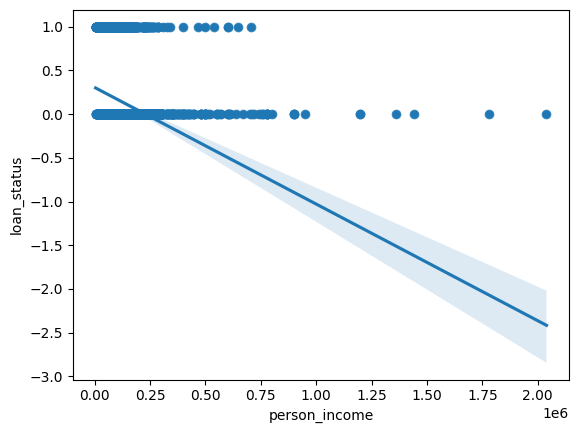

In [34]:
sns.scatterplot(data=df, x='person_income', y='loan_status')
sns.regplot(data=df, x='person_income', y='loan_status')

Loan Purpose Analysis

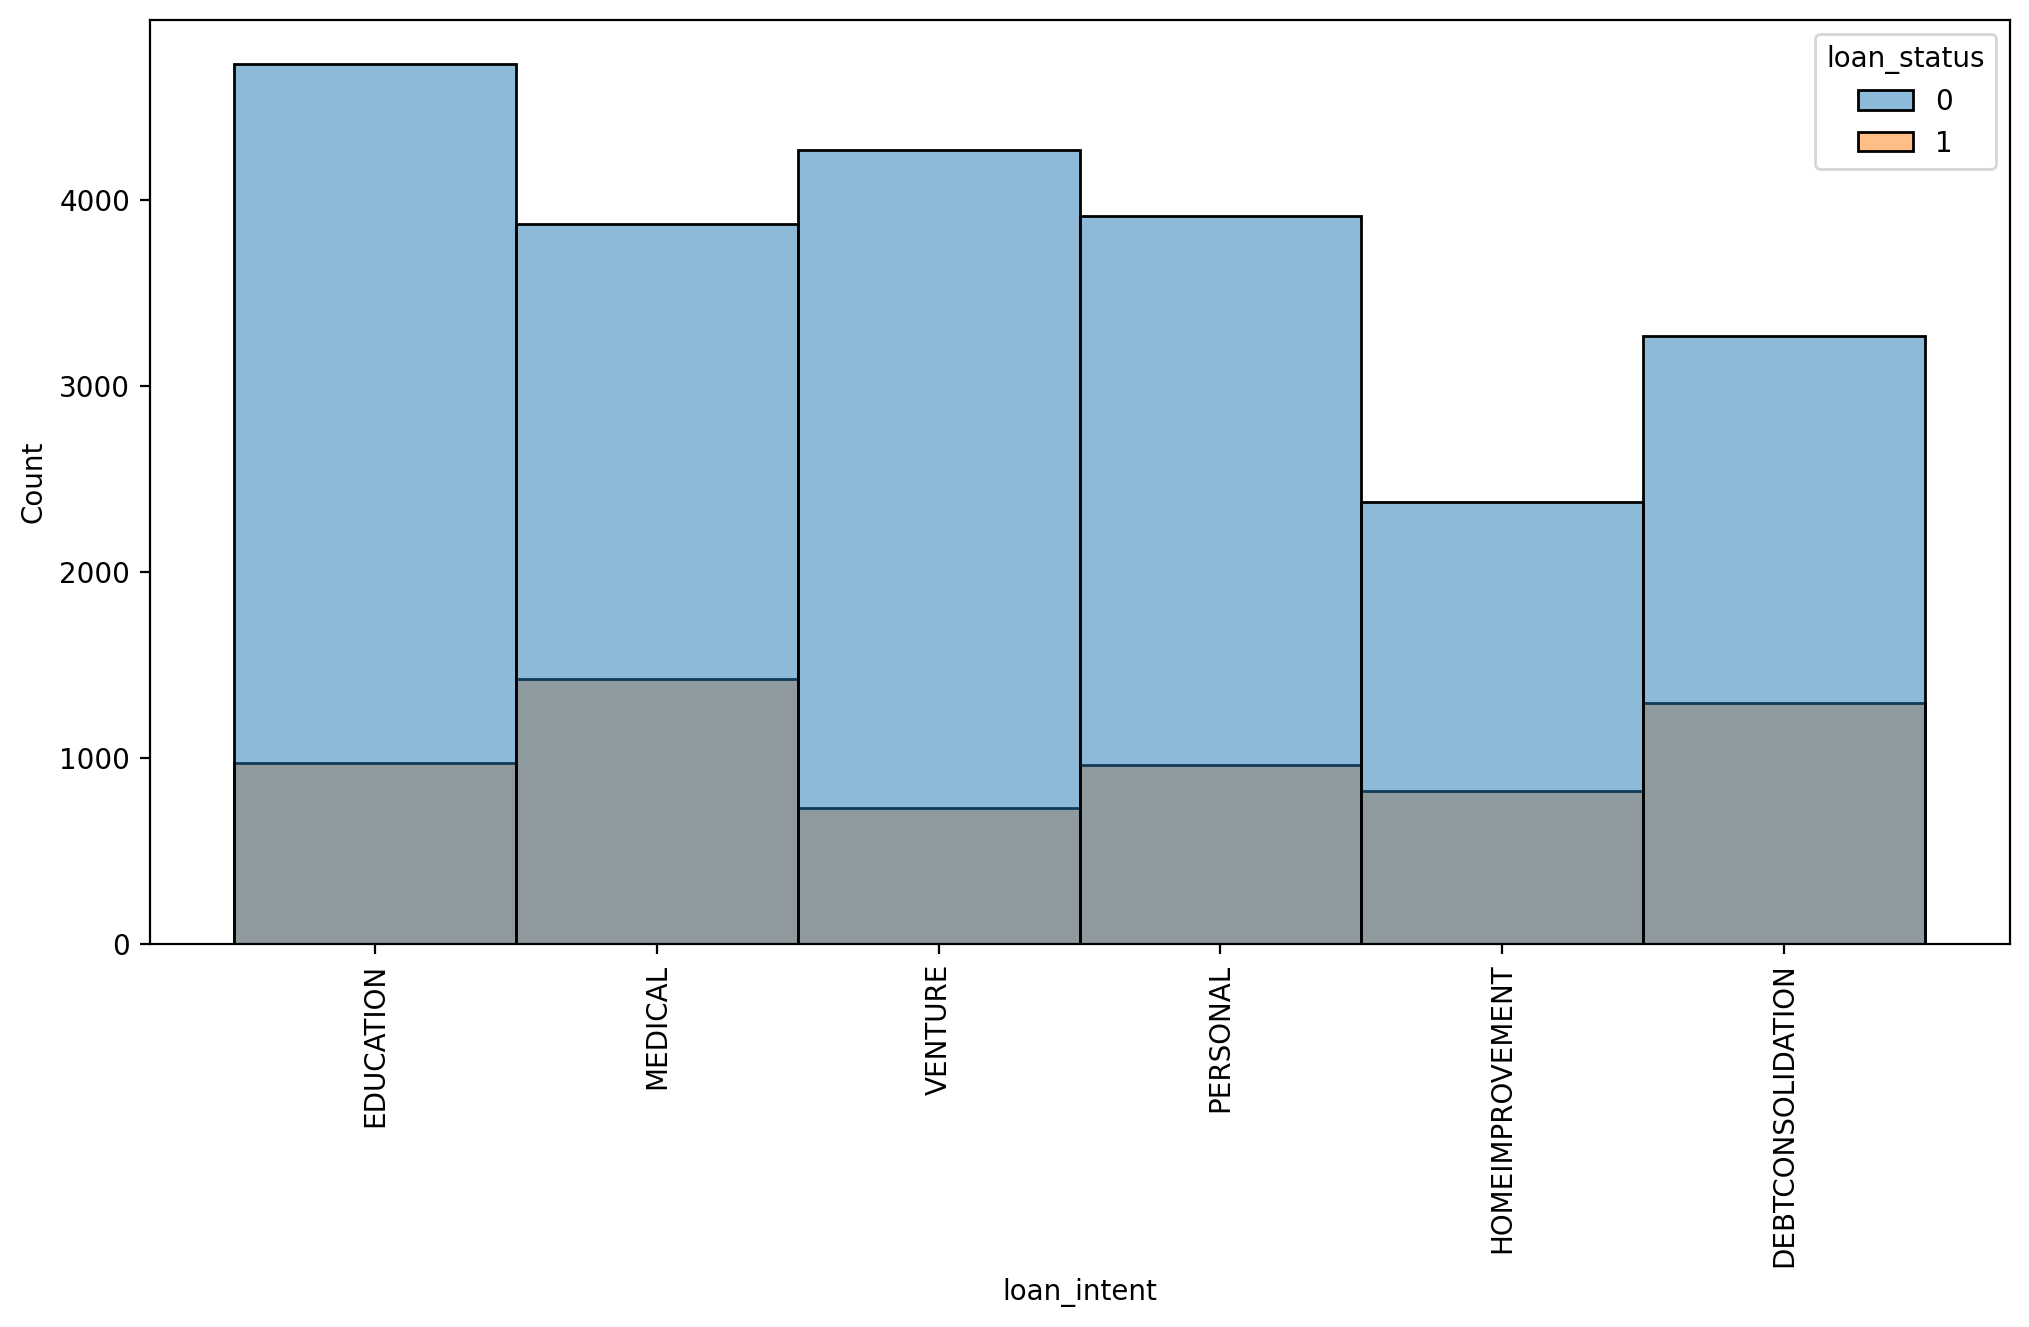

In [35]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='loan_intent', hue='loan_status')
plt.xticks(rotation=90);

In [36]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            5702
MEDICAL              5290
VENTURE              4999
PERSONAL             4874
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: count, dtype: int64

<Axes: xlabel='loan_intent', ylabel='count'>

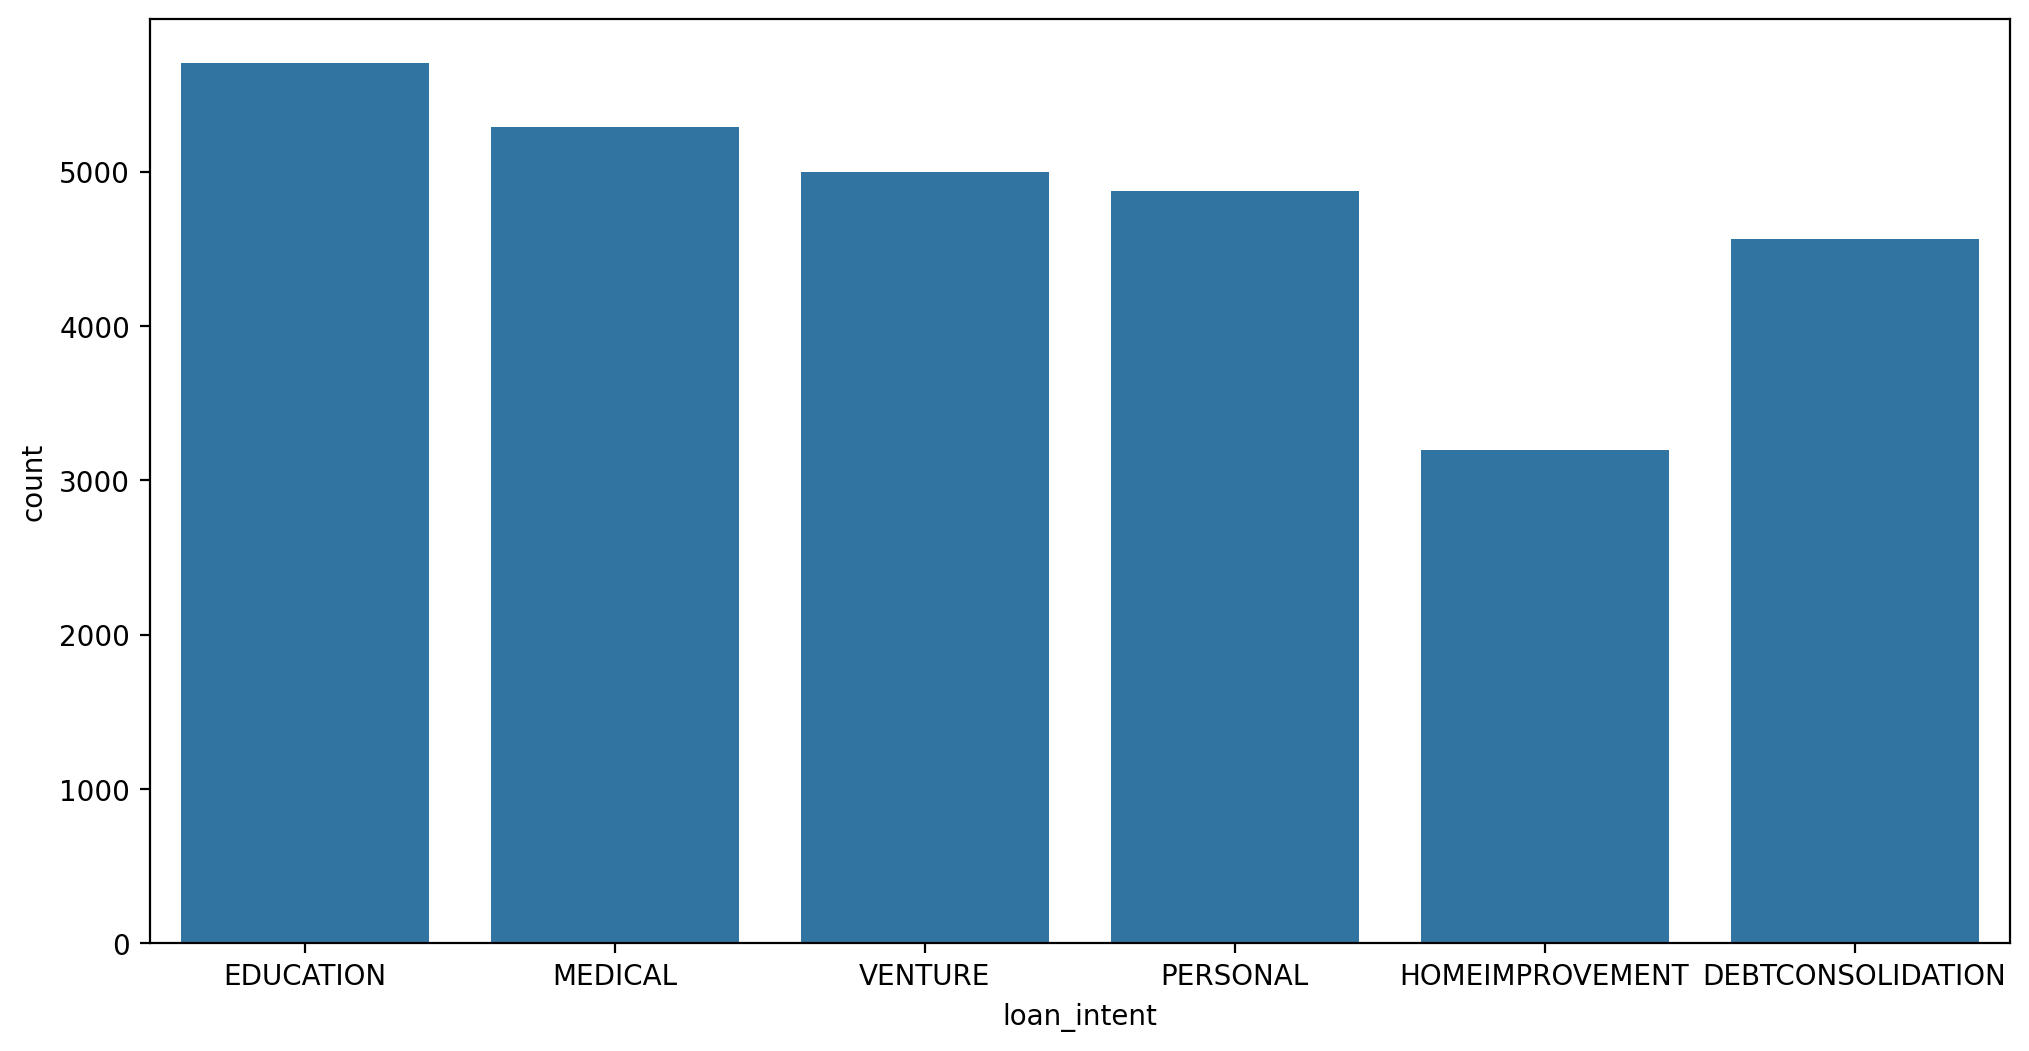

In [37]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df, x='loan_intent')

Home Ownership

In [38]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'Age_Group'],
      dtype='object')

<Axes: xlabel='person_home_ownership', ylabel='count'>

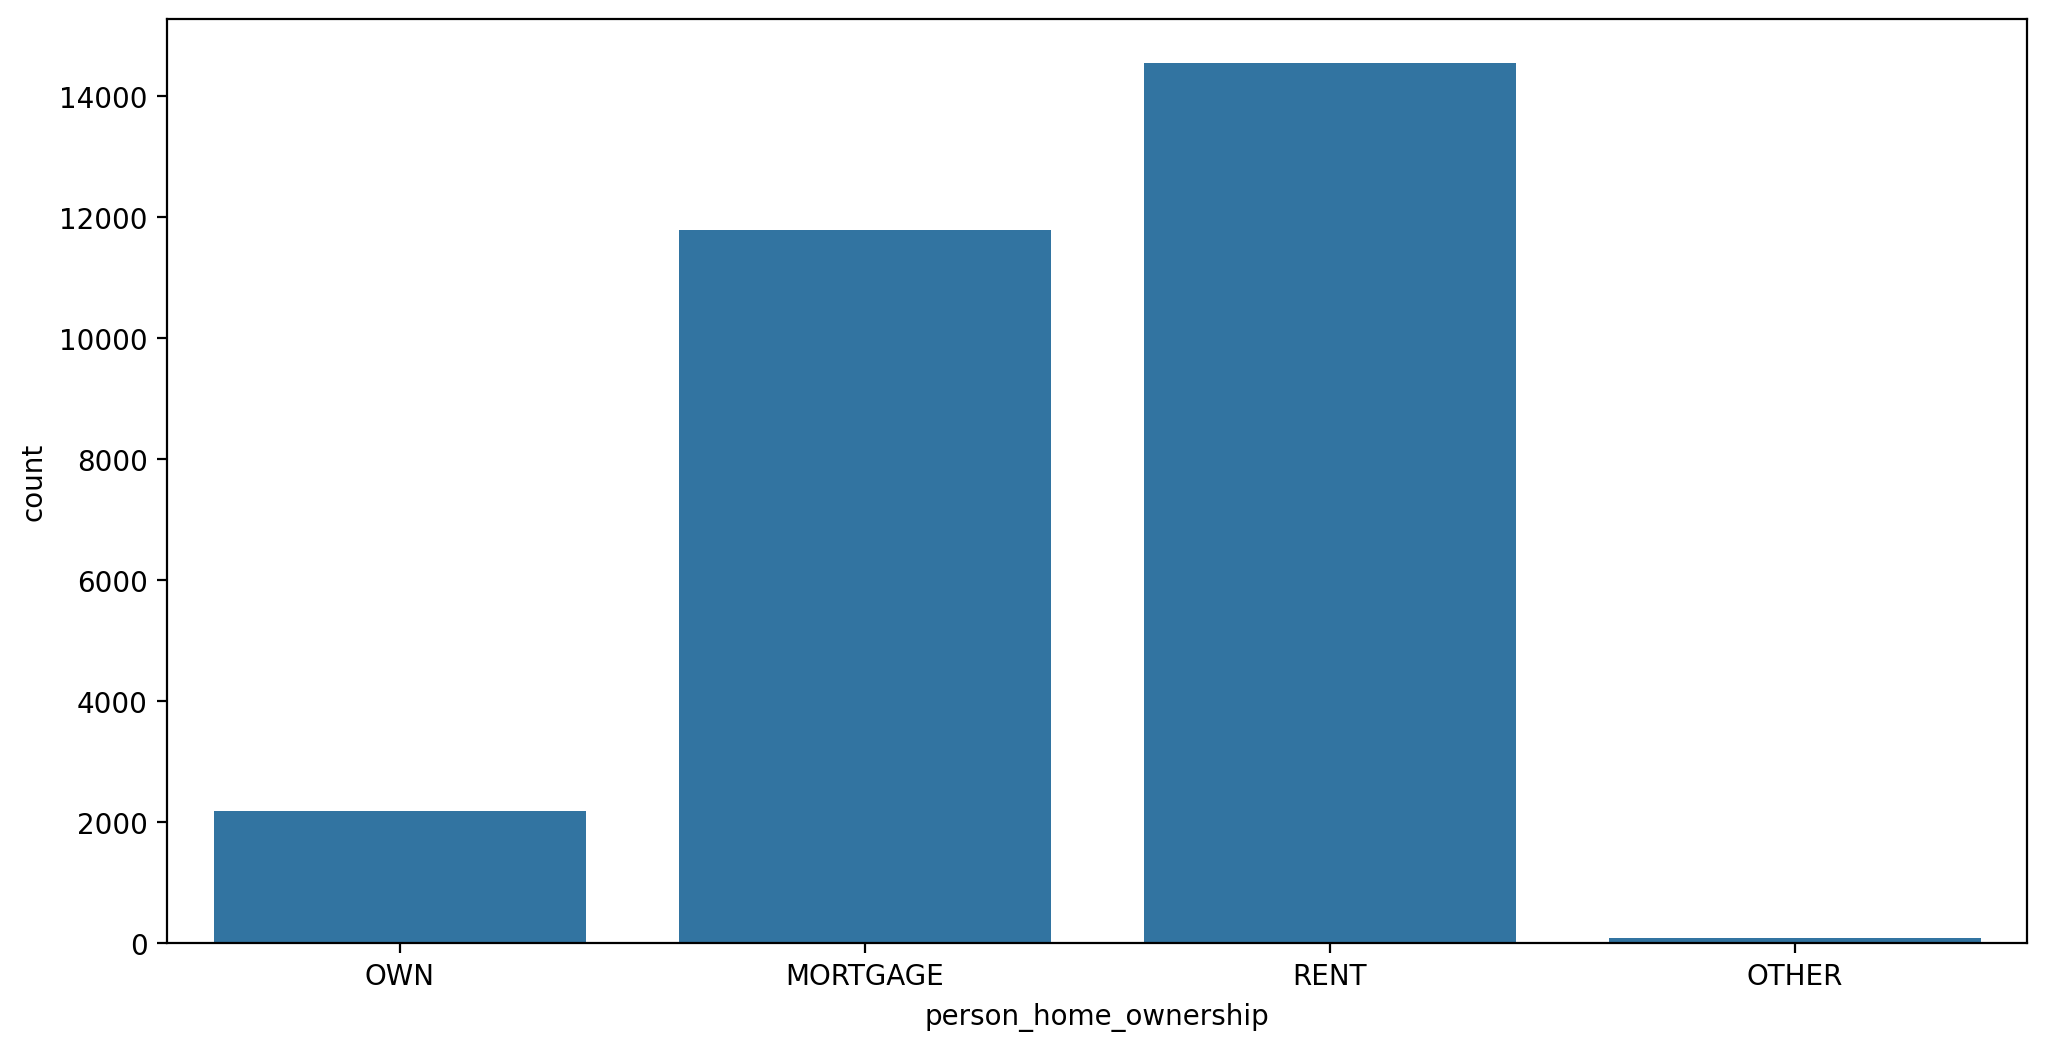

In [39]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df, x='person_home_ownership')

<Axes: xlabel='person_home_ownership', ylabel='Count'>

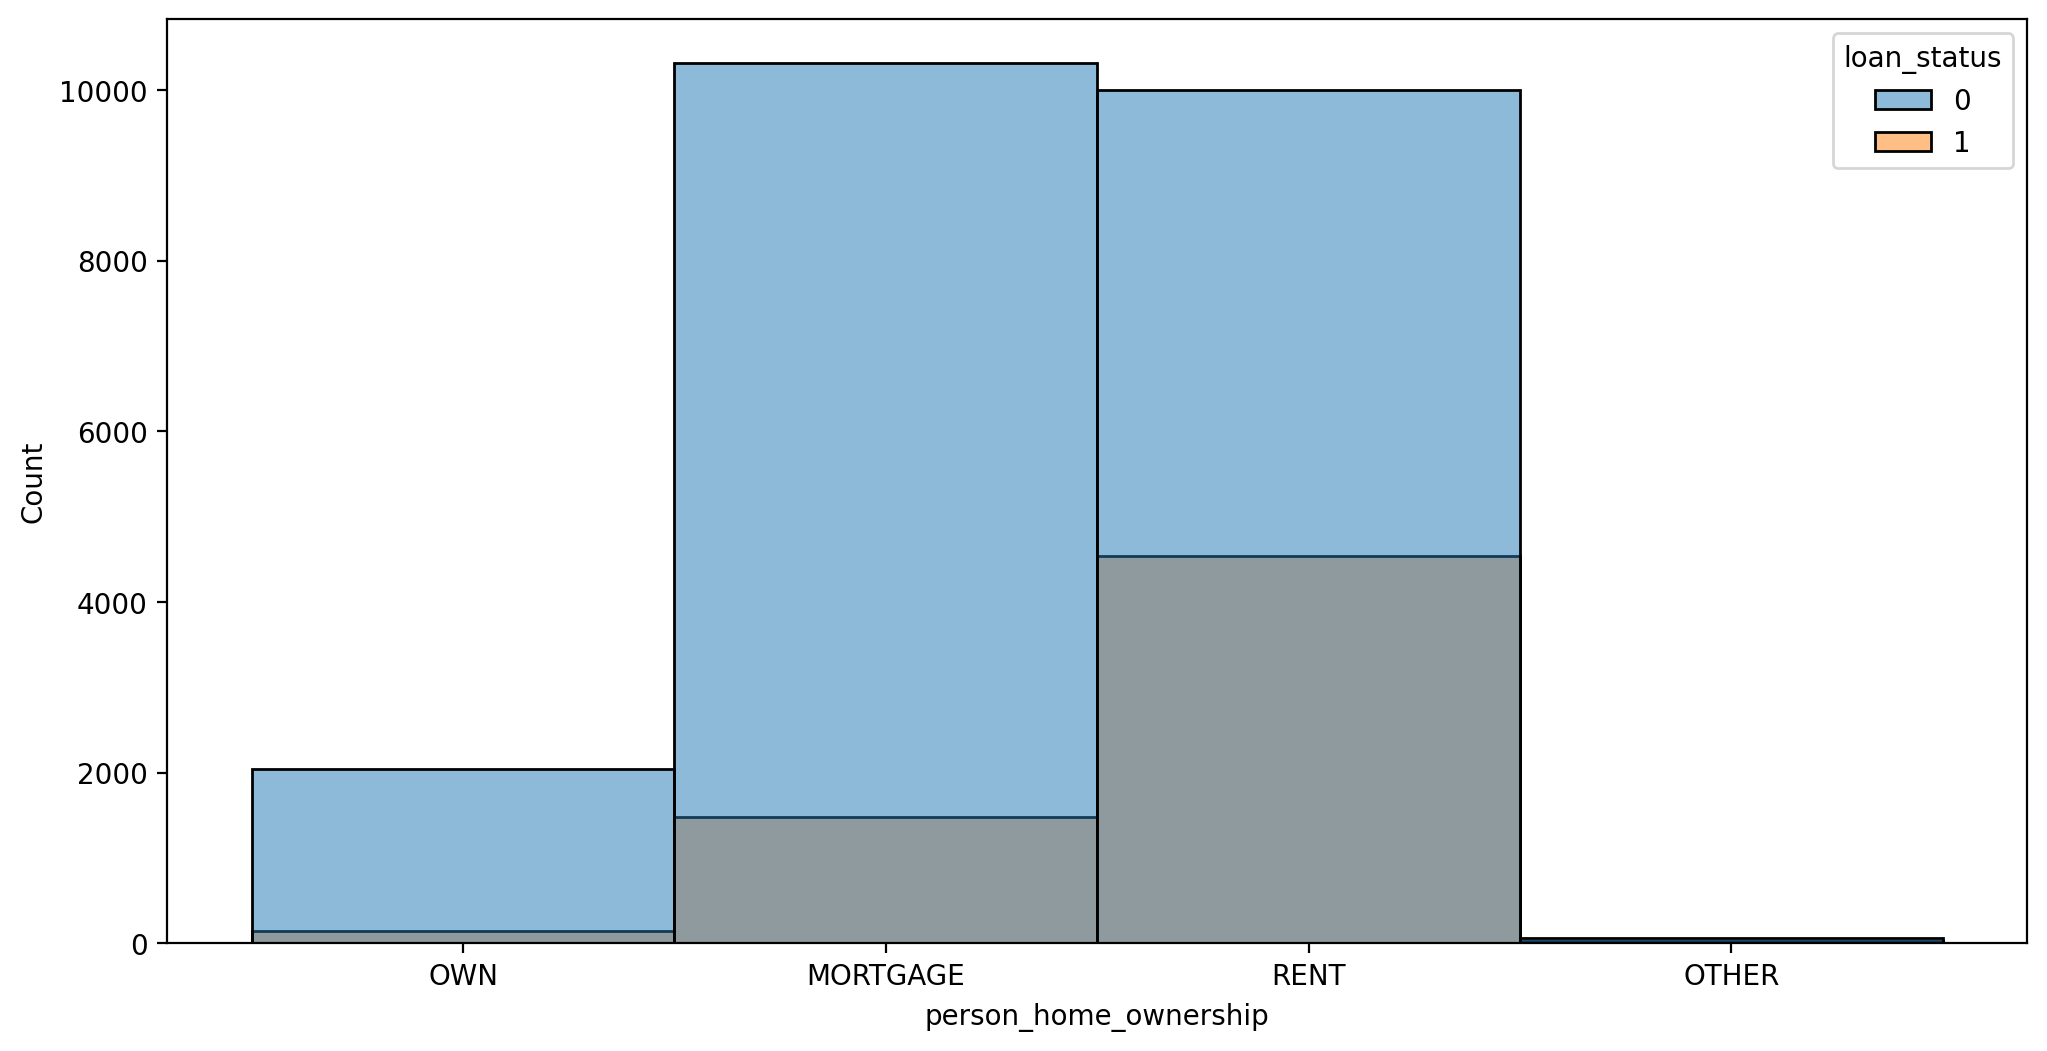

In [40]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='person_home_ownership',hue='loan_status')

Machine Learning

In [41]:
df = df.drop('Age_Group',axis=1)

In [42]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


In [43]:
new_df = pd.get_dummies(data=df,drop_first=True)
new_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,False,True,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,False,False,False,True,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,True,False,False,True,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,True,False,False,True,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,False,False,False,False,False,False,True,False,False
32577,54,120000,4.0,17625,7.49,0,0.15,19,False,False,False,False,False,False,True,False,False
32578,65,76000,3.0,35000,10.99,1,0.46,28,False,False,True,False,True,False,False,False,False
32579,56,150000,5.0,15000,11.48,0,0.10,26,False,False,False,False,False,False,True,False,False


In [44]:
X = new_df.drop('loan_status',axis=1)

In [45]:
y = new_df['loan_status']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000,solver='saga',penalty='elasticnet',l1_ratio=0.1)
log_model.fit(X_train,y_train)

LogisticRegression(l1_ratio=0.1, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [48]:
y_pred = log_model.predict(X_test)

In [49]:
def reports(y_test,y_pred):
    from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score,confusion_matrix
    print('Classification Report:')
    print(classification_report(y_test,y_pred))
    print('\n')
    print('Accurecy: ')
    ac = accuracy_score(y_test,y_pred)
    print(ac*100)
    print('\n')
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6735
           1       0.72      0.16      0.26      1854

    accuracy                           0.80      8589
   macro avg       0.76      0.57      0.57      8589
weighted avg       0.79      0.80      0.75      8589



Accurecy: 
80.45174059843987


Confusion Matrix:


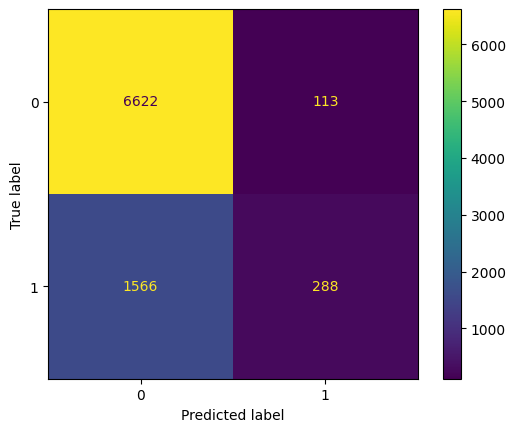

In [50]:
reports(y_test,y_pred)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier()
params = {
    'n_neighbors': [5,10,15],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,ConfusionMatrixDisplay
def grid_model(model,params,X_train,X_test, y_test,y_train):
    grid = GridSearchCV(model,params,cv=5)
    grid.fit(X_train,y_train)
    y_pred = grid.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    print('\nAccurecy')
    print(ac*100)
    parameter = grid.best_estimator_
    print('\nBest parameters')
    print(parameter)
    print("\n")
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()


              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6735
           1       0.67      0.53      0.59      1854

    accuracy                           0.84      8589
   macro avg       0.77      0.73      0.75      8589
weighted avg       0.83      0.84      0.84      8589


Accurecy
84.21236465246245

Best parameters
KNeighborsClassifier(n_neighbors=15, weights='distance')




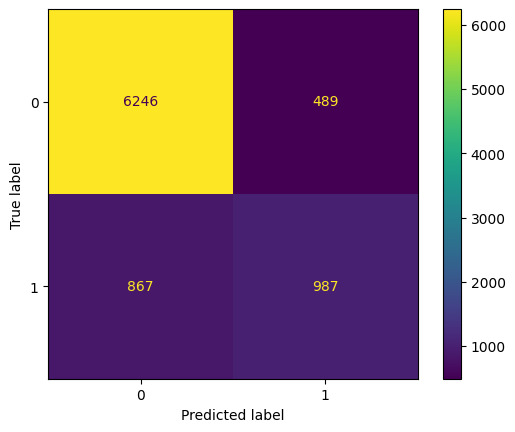

In [53]:
grid_model(neighbor,params,X_train,X_test, y_test,y_train)

In [54]:
knn_model = KNeighborsClassifier(n_neighbors=30,metric='minkowski')
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [55]:
y_pred = log_model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6735
           1       0.72      0.16      0.26      1854

    accuracy                           0.80      8589
   macro avg       0.76      0.57      0.57      8589
weighted avg       0.79      0.80      0.75      8589



Accurecy: 
80.45174059843987


Confusion Matrix:


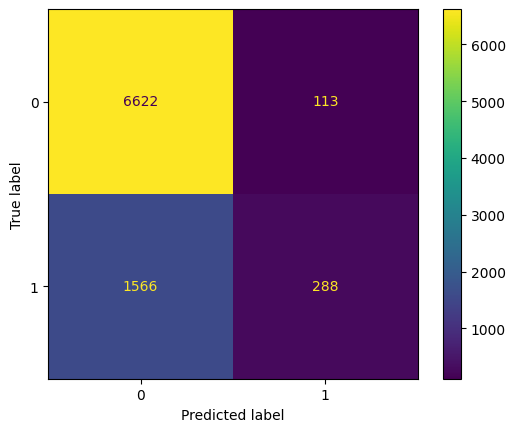

In [56]:
reports(y_test,y_pred)

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred = tree.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6735
           1       0.71      0.74      0.72      1854

    accuracy                           0.88      8589
   macro avg       0.82      0.83      0.82      8589
weighted avg       0.88      0.88      0.88      8589



Accurecy: 
87.85656071719642


Confusion Matrix:


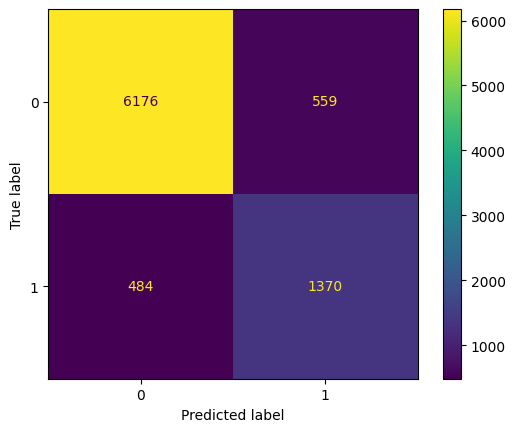

In [59]:
reports(y_test,y_pred)

In [60]:
tree_cv = DecisionTreeClassifier()
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [5,13,25],
}

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6735
           1       0.87      0.70      0.78      1854

    accuracy                           0.91      8589
   macro avg       0.90      0.84      0.86      8589
weighted avg       0.91      0.91      0.91      8589


Accurecy
91.32611479799743

Best parameters
DecisionTreeClassifier(criterion='entropy', max_depth=13)




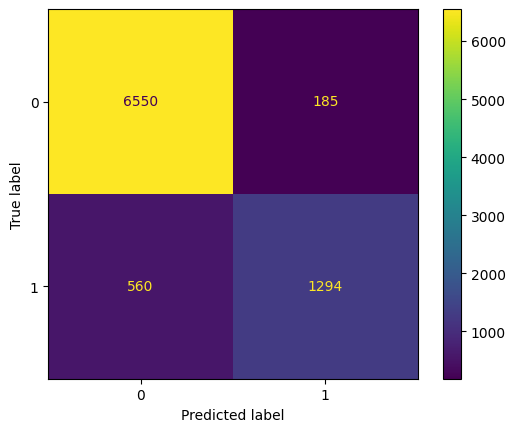

In [66]:
best_model = grid_model(tree_cv,params,X_train,X_test, y_test,y_train)

In [67]:
best_model

In [62]:
from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier(n_estimators=100,criterion='log_loss')
rand_model.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss')

In [63]:
y_pred = tree.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6735
           1       0.71      0.74      0.72      1854

    accuracy                           0.88      8589
   macro avg       0.82      0.83      0.82      8589
weighted avg       0.88      0.88      0.88      8589



Accurecy: 
87.85656071719642


Confusion Matrix:


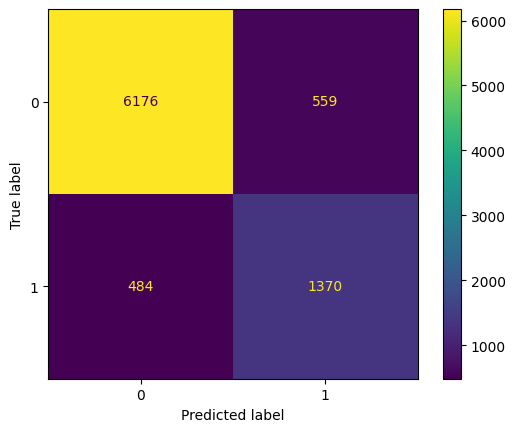

In [64]:
reports(y_test,y_pred)

In [ ]:
rand_model_cv = RandomForestClassifier()
params = {
    'n_estimators' : [100,500,1000],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [5,13,25],

}

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6735
           1       0.96      0.59      0.73      1854

    accuracy                           0.91      8589
   macro avg       0.93      0.79      0.84      8589
weighted avg       0.91      0.91      0.90      8589


Accurecy
90.54604726976365

Best parameters
RandomForestClassifier(max_leaf_nodes=25, n_estimators=1000)




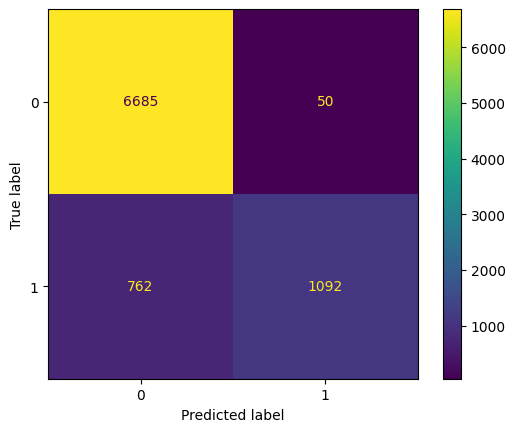

In [ ]:
grid_model(rand_model_cv,params,X_train,X_test, y_test,y_train)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
boost_model = AdaBoostClassifier(n_estimators=5000,algorithm='SAMME')
boost_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=5000)

In [ ]:
y_pred = boost_model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      6735
           1       0.79      0.62      0.70      1854

    accuracy                           0.88      8589
   macro avg       0.85      0.79      0.81      8589
weighted avg       0.88      0.88      0.88      8589



Accurecy: 
88.35720107113751


Confusion Matrix:


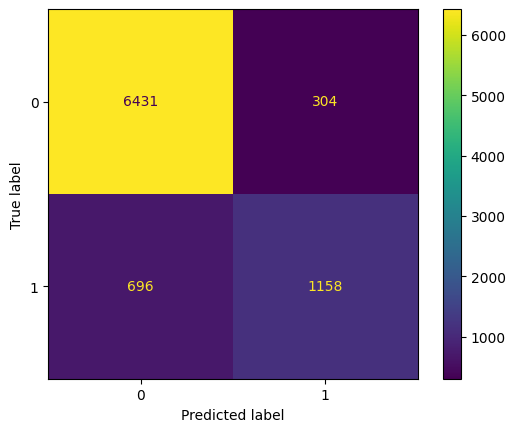

In [ ]:
reports(y_test,y_pred)